# Random Forest Regression

## Importing the libraries

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Importing the dataset

In [59]:
df = pd.read_csv('house_price_data.csv')
X = df.drop(['price'],1).values
y = df['price'].values
cols = df.drop(['price'],1).columns

In [60]:
X.shape

(21613, 20)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## Polynomial_regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score

y_pred = regressor.predict(poly_reg.transform(X_test))

print(explained_variance_score(y_test,y_pred),
metrics.mean_squared_error(y_test, y_pred),
metrics.mean_squared_error(y_test, y_pred,squared=False),
metrics.mean_absolute_error(y_test, y_pred))

0.8210923254603768 25848797374.590244 160775.6118775178 99389.51886488502


### Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8210893692411567

## Lasso Linear Reagression

In [21]:
from sklearn.linear_model import Lasso
regressorL = Lasso(alpha=0.1)
regressorL.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250316926516793.12, tolerance: 188234928252.12753
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score

y_pred = regressorL.predict(X_test)

print(explained_variance_score(y_test,y_pred),
      metrics.r2_score(y_test, y_pred),
      metrics.mean_squared_error(y_test, y_pred),
      metrics.mean_squared_error(y_test, y_pred,squared=False),
      metrics.mean_absolute_error(y_test, y_pred))

0.6860009132122522 0.6859922313321698 45367472865.72716 212996.4151475962 123259.86282740455


In [25]:
regressorL.coef_

array([-2.93236651e+04,  3.63253978e+04,  2.72105356e+02,  2.52845061e-01,
        1.26352721e+04,  6.18140711e+05,  5.23051392e+04,  2.97600570e+04,
        9.64372722e+04, -1.08317487e+02, -1.34719686e+02, -2.53221934e+03,
        1.46579046e+01, -5.13694494e+02,  6.10323946e+05, -2.06581871e+05,
        3.33758617e+01, -4.72450680e-01,  3.64787576e+04,  1.00578660e+03])

In [89]:
minmax = MinMaxScaler()
ranks = minmax.fit_transform(np.array([np.abs(regressorL.coef_)]).T).T
r = ranks.ravel()
rank = pd.DataFrame(r,index = cols,columns=['Lasso'])
rank = rank.sort_values('Lasso', ascending=False)
rank.T

,waterfront,lat,long,grade,view,year_sld,bathrooms,condition,bedrooms,floors,yr_built,mnth_sld,zipcode,sqft_living,sqft_basement,sqft_above,sqft_living15,yr_renovated,sqft_lot15,sqft_lot
Lasso,1.0,0.987354,0.334199,0.156011,0.084617,0.059013,0.058765,0.048144,0.047438,0.02044,0.004096,0.001627,0.000831,0.00044,0.000218,0.000175,0.000054,0.000023,3.552682e-07,0.0


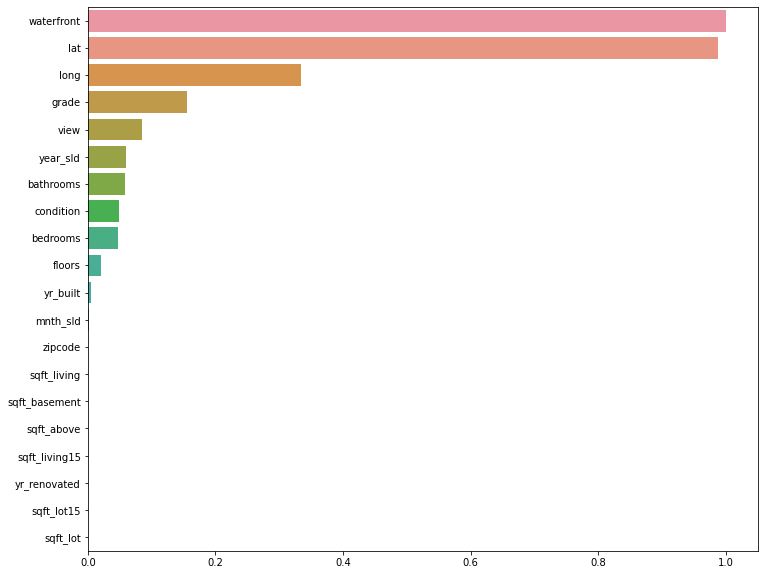

In [103]:
plt.figure(figsize = (12,10))
sns.barplot(rank.values.ravel(), rank.index )

##Ridg regression

In [27]:
from sklearn.linear_model import Ridge
regressorR = Ridge(alpha=1.0)
regressorR.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score

y_pred = regressorR.predict(X_test)

print(explained_variance_score(y_test,y_pred),
      metrics.r2_score(y_test, y_pred),
      metrics.mean_squared_error(y_test, y_pred),
      metrics.mean_squared_error(y_test, y_pred,squared=False),
      metrics.mean_absolute_error(y_test, y_pred))

0.6860600926716869 0.6860515923185969 45358896460.269295 212976.28144999925 123233.95066853524


In [116]:
minmax = MinMaxScaler()
ranksR = minmax.fit_transform(np.array([np.abs(regressorR.coef_)]).T).T
Rdg = ranksR.ravel()
rankRdg = pd.DataFrame(Rdg,index = cols,columns=['Rdg'])
rankRdg = rankRdg.sort_values('Rdg', ascending=False)
rankRdg.T

,waterfront,lat,long,grade,view,year_sld,bathrooms,condition,bedrooms,floors,yr_built,mnth_sld,zipcode,sqft_living,sqft_above,sqft_basement,sqft_living15,yr_renovated,sqft_lot15,sqft_lot
Rdg,1.0,0.993287,0.335395,0.157763,0.085954,0.059579,0.059395,0.048618,0.047995,0.020832,0.004146,0.001643,0.000834,0.000164,0.000103,0.00006,0.000054,0.000024,3.613727e-07,0.0


## Random Forest Regression

In [ ]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X_train,y_train)

In [110]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score

y_pred = rf.predict(X_test)

print(explained_variance_score(y_test,y_pred),
      metrics.r2_score(y_test, y_pred),
      metrics.mean_squared_error(y_test, y_pred),
      metrics.mean_squared_error(y_test, y_pred,squared=False),
      metrics.mean_absolute_error(y_test, y_pred))

0.8591917905737498 0.8591393303219432 20351383778.11127 142658.27623419283 68497.34315061453


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.1s finished


In [111]:
rf.feature_importances_

array([0.00269717, 0.01061606, 0.29442474, 0.01398105, 0.00153878,
       0.04134222, 0.01670461, 0.00289466, 0.26453517, 0.01615862,
       0.00488891, 0.02222986, 0.00224194, 0.01461197, 0.16887798,
       0.07186821, 0.03020259, 0.01250256, 0.00123903, 0.00644386])

In [117]:
minmax = MinMaxScaler()
ranksR = minmax.fit_transform(np.array([np.abs(rf.feature_importances_)]).T).T
R = ranksR.ravel()
rankrf = pd.DataFrame(R,index = cols,columns=['RandomForest'])
rankrf = rankrf.sort_values('RandomForest', ascending=False)
rankrf.T

,sqft_living,grade,lat,long,waterfront,sqft_living15,yr_built,view,sqft_above,zipcode,sqft_lot,sqft_lot15,bathrooms,mnth_sld,sqft_basement,condition,bedrooms,yr_renovated,floors,year_sld
RandomForest,1.0,0.898052,0.571784,0.240903,0.136784,0.098789,0.071596,0.05275,0.050888,0.045613,0.043461,0.038418,0.031983,0.017753,0.012449,0.005647,0.004973,0.003421,0.001022,0.0


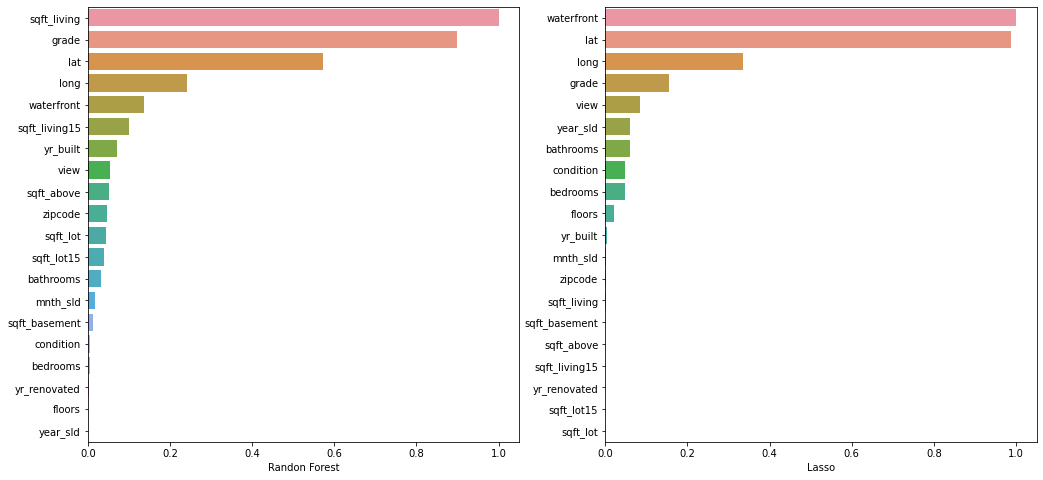

In [129]:
plt.figure(figsize = (17,8))
plt.subplot(1,2,1, xlabel = 'Randon Forest')
sns.barplot(rankrf.values.ravel(), rankrf.index )
plt.subplot(1,2,2 , xlabel = 'Lasso')
sns.barplot(rank.values.ravel(), rank.index)